In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump, load
from sklearn.dummy import DummyClassifier
from sklearn.metrics import make_scorer, confusion_matrix, fbeta_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
import xgboost as xgb
import lightgbm as lgb 

In [11]:
X_train = pd.read_csv('./model_csv/X_train_Kickstarter.csv')
X_test = pd.read_csv('./model_csv/X_test_Kickstarter.csv')
y_train = pd.read_csv('./model_csv/y_train_Kickstarter.csv')
y_test = pd.read_csv('./model_csv/y_test_Kickstarter.csv')
y_train = y_train['state']
y_test = y_test['state']

In [12]:
RSEED=42

# Dummy Classifier

In [13]:
dummy_clf = DummyClassifier(strategy = 'most_frequent')

In [14]:
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [15]:
y_pred = dummy_clf.predict(X_test)

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     22545
           1       0.61      1.00      0.76     35190

    accuracy                           0.61     57735
   macro avg       0.30      0.50      0.38     57735
weighted avg       0.37      0.61      0.46     57735



In [17]:
cnf_matrix = confusion_matrix(y_test, y_pred)

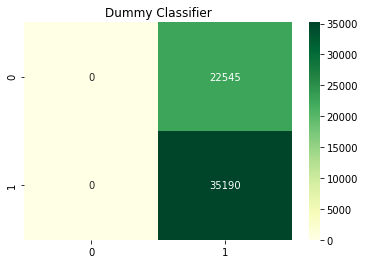

In [18]:
ax = plt.axes()
sns.heatmap(cnf_matrix, annot = True, fmt = "g", cmap='YlGn', ax=ax)
ax.set_title('Dummy Classifier')
plt.show();

# KNN Classifier

In [19]:
knn_clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', n_jobs=-1)

In [20]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1)

In [21]:
#y_pred_knn = knn_clf.predict(X_test)
y_pred_knn = np.ones(len(y_test))

In [22]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     22545
           1       0.61      1.00      0.76     35190

    accuracy                           0.61     57735
   macro avg       0.30      0.50      0.38     57735
weighted avg       0.37      0.61      0.46     57735



In [23]:
confm_knn = confusion_matrix(y_test, y_pred_knn)

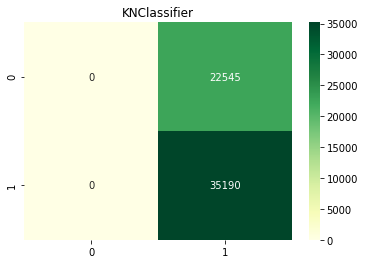

In [24]:
ax = plt.axes()
sns.heatmap(confm_knn, annot = True, fmt = "g", cmap='YlGn', ax=ax)
ax.set_title('KNClassifier')
plt.show();

# SGDClassifier

In [25]:
sgd_clf = SGDClassifier(loss='hinge', max_iter=1000, alpha=0.0001, random_state=RSEED)

In [26]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [27]:
y_pred_sgd = sgd_clf.predict(X_test)

In [28]:
print(classification_report(y_test, y_pred_sgd))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50     22545
           1       0.68      0.68      0.68     35190

    accuracy                           0.61     57735
   macro avg       0.59      0.59      0.59     57735
weighted avg       0.61      0.61      0.61     57735



In [29]:
confm_sgd = confusion_matrix(y_test, y_pred_sgd)

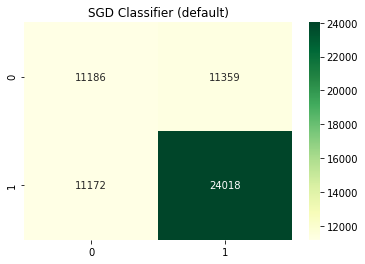

In [30]:
ax = plt.axes()
sns.heatmap(confm_sgd, annot = True, fmt = "g", cmap='YlGn', ax=ax)
ax.set_title('SGD Classifier (default)')
plt.show();

## SGD Classifier - GridSearch

In [31]:
sgd_gs_clf = SGDClassifier(max_iter=1000, random_state=RSEED)

In [32]:
param_grid = {"loss" : ["hinge", "log"],
              "alpha" : [0.0001, 0.001, 0.01, 0.1],
              "penalty" : ["l2", "elasticnet"]
             }

In [33]:
gs = GridSearchCV(sgd_gs_clf, param_grid, scoring='accuracy', cv=5, verbose=5, n_jobs=-1)

In [34]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=SGDClassifier(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'loss': ['hinge', 'log'],
                         'penalty': ['l2', 'elasticnet']},
             scoring='accuracy', verbose=5)

In [35]:
# Best score
print('Best score:', round(gs.best_score_, 3))
# Best parameters
print('Best parameters:', gs.best_params_)

Best score: 0.629
Best parameters: {'alpha': 0.01, 'loss': 'log', 'penalty': 'l2'}


In [36]:
y_pred_gs = gs.best_estimator_.predict(X_test)

In [37]:
print(classification_report(y_test, y_pred_gs))

              precision    recall  f1-score   support

           0       0.50      0.49      0.50     22545
           1       0.68      0.69      0.68     35190

    accuracy                           0.61     57735
   macro avg       0.59      0.59      0.59     57735
weighted avg       0.61      0.61      0.61     57735



In [38]:
confm_gs = confusion_matrix(y_test, y_pred_gs)

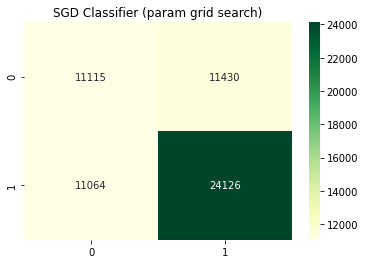

In [39]:
ax = plt.axes()
sns.heatmap(confm_gs, annot = True, fmt = "g", cmap='YlGn', ax=ax)
ax.set_title('SGD Classifier (param grid search)')
plt.show();

# LightGBM

In [40]:
lgb_clf = lgb.LGBMClassifier()

In [41]:
lgb_clf.fit(X_train, y_train)

LGBMClassifier()

In [42]:
y_pred_lgb = lgb_clf.predict(X_test)

In [43]:
print(classification_report(y_test, y_pred_lgb))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71     22545
           1       0.82      0.82      0.82     35190

    accuracy                           0.78     57735
   macro avg       0.77      0.77      0.77     57735
weighted avg       0.78      0.78      0.78     57735



In [44]:
confm_lgb = confusion_matrix(y_test, y_pred_lgb)

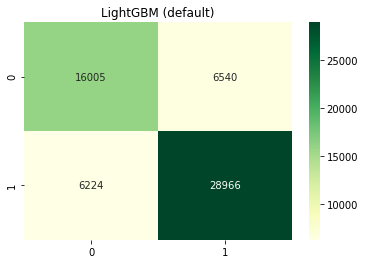

In [45]:
ax = plt.axes()
sns.heatmap(confm_lgb, annot = True, fmt = "g", cmap='YlGn', ax=ax)
ax.set_title('LightGBM (default)')
plt.show();

# LightGBM GridSearchCV

# XGBoost

In [46]:
xgb_clf = xgb.XGBClassifier()

In [47]:
xgb_clf.fit(X_train, y_train)

[21:54:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:
y_pred_xgb = xgb_clf.predict(X_test)

In [49]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71     22545
           1       0.81      0.83      0.82     35190

    accuracy                           0.78     57735
   macro avg       0.77      0.76      0.76     57735
weighted avg       0.78      0.78      0.78     57735



In [50]:
confm_xgb = confusion_matrix(y_test, y_pred_xgb)

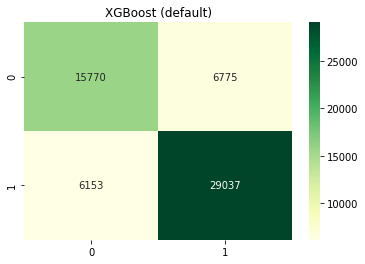

In [51]:
ax = plt.axes()
sns.heatmap(confm_xgb, annot = True, fmt = "g", cmap='YlGn', ax=ax)
ax.set_title('XGBoost (default)')
plt.show();